### *Preprocessing, Visualisasi,* dan *Feature Extraction*
Data *Breast Cancer Wisconsin Diagnostic Dataset Kaggle*

**Oleh:** 

Dea Restika Augustina Pratiwi (06211740000023)


##### Download Data : [kaggle](https://drive.google.com/file/d/1sqrmytAewju0K6fnUoiQhp_GK2Dy__nz/view)

**Impor Library**

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

**Impor Data**

In [2]:
data = pd.read_excel('D:/breastcancer.xlsx')
data

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 13 columns):
id                   569 non-null int64
diagnosis            569 non-null object
radius               569 non-null float64
texture              569 non-null float64
perimeter            569 non-null float64
area                 569 non-null float64
smoothness           569 non-null float64
compactness          569 non-null float64
concavity            569 non-null float64
concave points       569 non-null float64
symmetry             569 non-null float64
fractal_dimension    569 non-null float64
Unnamed: 32          0 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 57.9+ KB


### <center>A. *PREPROCESSING*</center>

### 1. Deteksi *Missing Value*

In [4]:
np.sum(data.isnull())

id                     0
diagnosis              0
radius                 0
texture                0
perimeter              0
area                   0
smoothness             0
compactness            0
concavity              0
concave points         0
symmetry               0
fractal_dimension      0
Unnamed: 32          569
dtype: int64

Dari output di atas dapat diketahui bahwa terdapat missing value pada variabel unnamed: 32. Namun, yang terjadi adalah keseluruhan pengamatan pada variabel tersebut terjadi missing value, hal ini dapat diamati dari jumlah missing value = jumlah entri data. Maka karena tidak ada informasi sama sekali mengenai variabel ini, variabel akan dihapus dari pegamatan. Selain itu akan dilakukan penghapusan pada vriabel ID karena tidak digunakan dalam analisis.

In [5]:
data.drop("Unnamed: 32", axis = 1, inplace = True)
data.drop("id", axis = 1, inplace = True)

In [6]:
np.sum(data.isnull())

diagnosis            0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
concavity            0
concave points       0
symmetry             0
fractal_dimension    0
dtype: int64

Sekarang, dalam data sudah tidak ada lagi missing value

### 2. Deteksi *Outlier*
Deteksi *outlier* akan dilakukan dengan menggunakan *boxplot*
Note : Karena terdapat 10 variabel yang akan dideteksi outliernya dan tidak memungkinkan jika dijadikan 1 plot, maka digunakan subplot

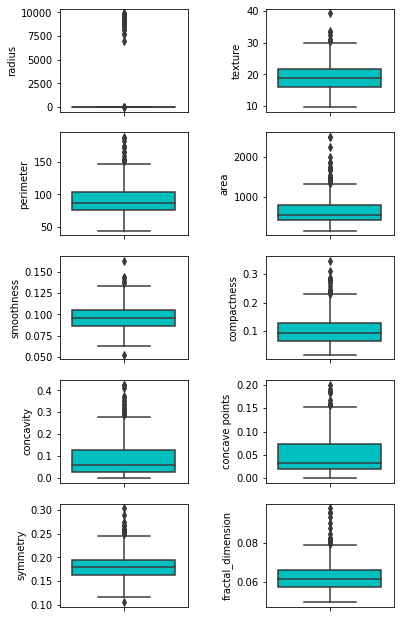

In [7]:
plt.figure(figsize = (6,11))
plt.subplot(521)
sns.boxplot(x = data['radius'], saturation = 1, width = 0.8, color = 'c', orient = 'v')
plt.subplots_adjust(wspace = 0.6)
plt.subplot(522)
sns.boxplot(x = data['texture'], saturation = 1, width = 0.8, color = 'c', orient = 'v')
plt.subplot(523)
sns.boxplot(x = data['perimeter'], saturation = 1, width = 0.8, color = 'c', orient = 'v')
plt.subplot(524)
sns.boxplot(x = data['area'], saturation = 1, width = 0.8, color = 'c', orient = 'v')
plt.subplot(525)
sns.boxplot(x = data['smoothness'], saturation = 1, width = 0.8, color = 'c', orient = 'v')
plt.subplot(526)
sns.boxplot(x = data['compactness'], saturation = 1, width = 0.8, color = 'c', orient = 'v')
plt.subplot(527)
sns.boxplot(x = data['concavity'], saturation = 1, width = 0.8, color = 'c', orient = 'v')
plt.subplot(528)
sns.boxplot(x = data['concave points'], saturation = 1, width = 0.8, color = 'c', orient = 'v')
plt.subplot(529)
sns.boxplot(x = data['symmetry'], saturation = 1, width = 0.8, color = 'c', orient = 'v')
plt.subplot(5, 2, 10)
sns.boxplot(x = data['fractal_dimension'], saturation = 1, width = 0.8, color = 'c', orient = 'v')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

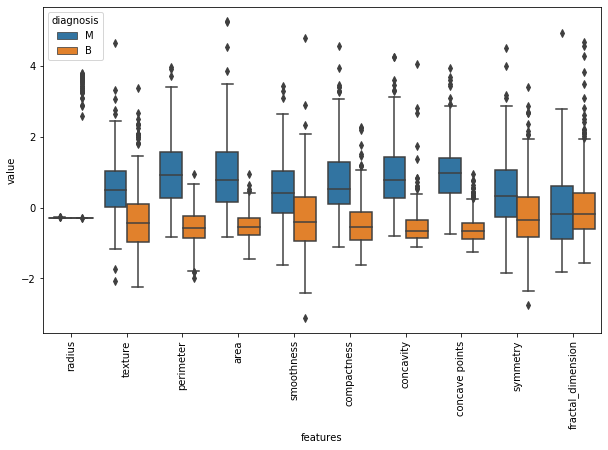

In [8]:
## Alternatif lain dari boxplot
data = pd.read_excel('D:/breastcancer.xlsx')
data
y = data.diagnosis 
data_dia = y
list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list,axis = 1 )
data = x
data_n_2 = (data - data.mean()) / (data.std())
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,6))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

### <center>B. *Summary Statistics*</center>

In [9]:
data = pd.read_excel('D:/breastcancer.xlsx')
list = ['Unnamed: 32','id','diagnosis']
data = data.drop(list,axis = 1 )
data.describe()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,706.771388,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,2430.243368,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,7.760000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,12.210000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.850000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,17.680000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,9904.000000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


### <center>C. Visualisasi Data</center>

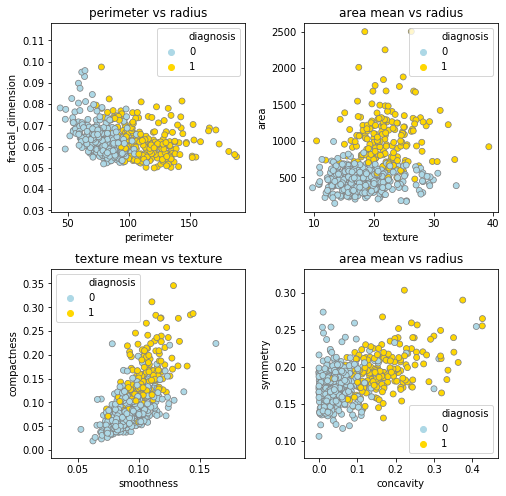

In [16]:
data = pd.read_excel('D:/breastcancer.xlsx')
list = ['Unnamed: 32','id']
data = data.drop(list,axis = 1 )
data.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'grey'

fig = plt.figure(figsize=(8,8))

plt.subplot(221)
ax1 = sns.scatterplot(x = data['perimeter'], y = data['fractal_dimension'], hue = "diagnosis",
                    data = data, palette = palette, edgecolor=edgecolor)
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.title('perimeter vs radius')
plt.subplot(222)
ax2 = sns.scatterplot(x = data['texture'], y = data['area'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs radius')
plt.subplot(223)
ax3 = sns.scatterplot(x = data['smoothness'], y = data['compactness'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs texture')
plt.subplot(224)
ax4 = sns.scatterplot(x = data['concavity'], y = data['symmetry'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs radius')

plt.savefig('1')
plt.show()

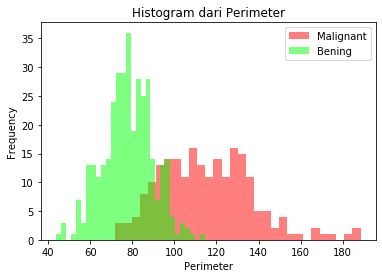

TypeError: 'list' object is not callable

In [27]:
data = pd.read_excel('D:/breastcancer.xlsx')
data.drop(["Unnamed: 32", "id"], axis = 1, inplace = True)
m = plt.hist(data[data["diagnosis"] == "M"].perimeter,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(data[data["diagnosis"] == "B"].perimeter,bins=30,fc = (0,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Perimeter")
plt.ylabel("Frequency")
plt.title("Histogram dari Perimeter")
plt.show()
frequent_malignant_perimeter = m[0].max()
index_frequent_malignant_perimeter = list(m[0]).index(frequent_malignant_perimeter)
most_frequent_malignant_perimeter = m[1][index_frequent_malignant_perimeter]
print("Most frequent malignant radius mean is: ",most_frequent_malignant_perimeter)

### <center>D. Analisis *Cluster*</center>

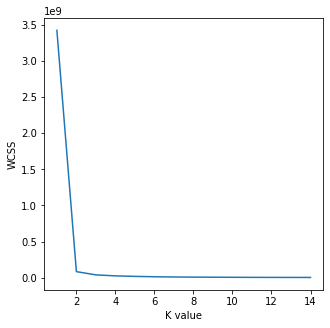

In [17]:
data = pd.read_excel('D:/breastcancer.xlsx')
data.drop(["Unnamed: 32", "id"], axis = 1, inplace = True)
dataWithoutLabels = data.drop(["diagnosis"], axis = 1)
wcss = []

for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(dataWithoutLabels)
    wcss.append(kmeansForLoop.inertia_)

plt.figure(figsize = (5, 5))
plt.plot(range(1, 15), wcss)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib.cm as cm
%matplotlib inline
from sklearn import preprocessing
from subprocess import check_output
data = pd.read_excel('D:/breastcancer.xlsx')
data = data.drop('id',axis=1)
data = data.drop('Unnamed: 32',axis=1)
datas = pd.DataFrame(preprocessing.scale(data.iloc[:,1:32]))
datas.columns = list(data.iloc[:,1:32].columns)
datas['diagnosis'] = data['diagnosis']
data_drop = datas.drop('diagnosis',axis=1)
X = data_drop.values
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=40, n_iter= 4000)
Y = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.019s...
[t-SNE] Computed neighbors for 569 samples in 0.301s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 0.854414
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.555824
[t-SNE] KL divergence after 2000 iterations: 0.680218


Text(0.5, 1.0, 'Actual clusters')

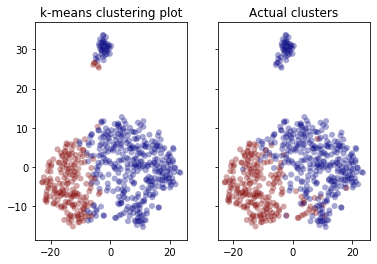

In [5]:
from sklearn.cluster import KMeans
kmns = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
kY = kmns.fit_predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(Y[:,0],Y[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('k-means clustering plot')

ax2.scatter(Y[:,0],Y[:,1],  c = datas['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')

In [13]:
dataWithoutLabels = data.loc[:,['area','texture']]
kmeans = KMeans(n_clusters = 2)
clusters = kmeans.fit_predict(dataWithoutLabels)
dataWithoutLabels["type"] = clusters
dataWithoutLabels["type"].unique()

array([0, 1], dtype=int64)

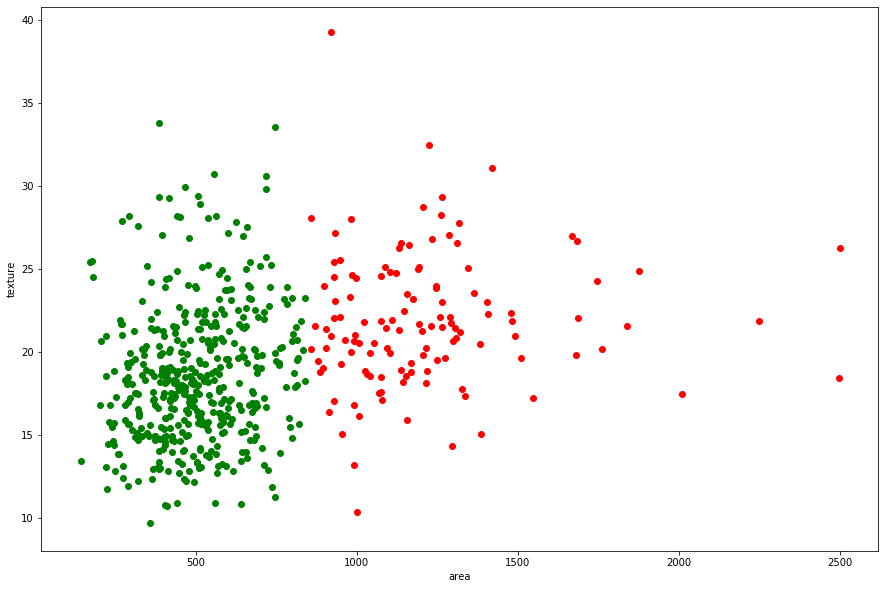

In [14]:
plt.figure(figsize = (15, 10))
plt.scatter(dataWithoutLabels["area"][dataWithoutLabels["type"] == 0], dataWithoutLabels["texture"][dataWithoutLabels["type"] == 0], color = "red")
plt.scatter(dataWithoutLabels["area"][dataWithoutLabels["type"] == 1], dataWithoutLabels["texture"][dataWithoutLabels["type"] == 1], color = "green")
plt.xlabel('area')
plt.ylabel('texture')
plt.show()

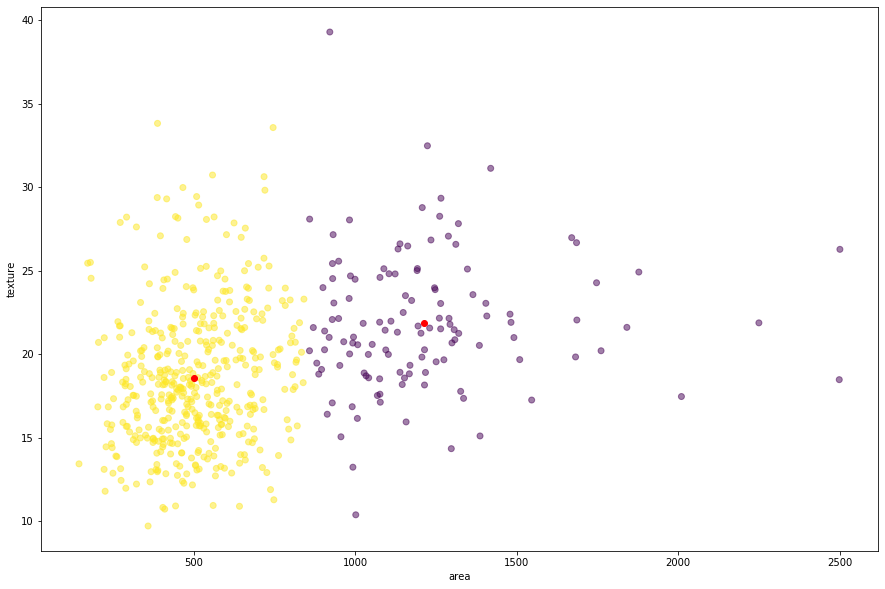

In [17]:
plt.figure(figsize = (15, 10))
plt.scatter(dataWithoutLabels["area"], dataWithoutLabels["texture"], c = clusters, alpha = 0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = "red", alpha = 1)
plt.xlabel('area')
plt.ylabel('texture')
plt.show()

In [18]:
dataWithoutTypes = dataWithoutLabels.drop(["type"], axis = 1)
dataWithoutTypes.head()

,area,texture
0,1001.0,10.38
1,1326.0,17.77
2,1203.0,21.25
3,386.1,20.38
4,1297.0,14.34


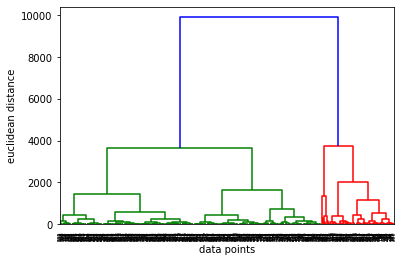

In [19]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(dataWithoutTypes, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

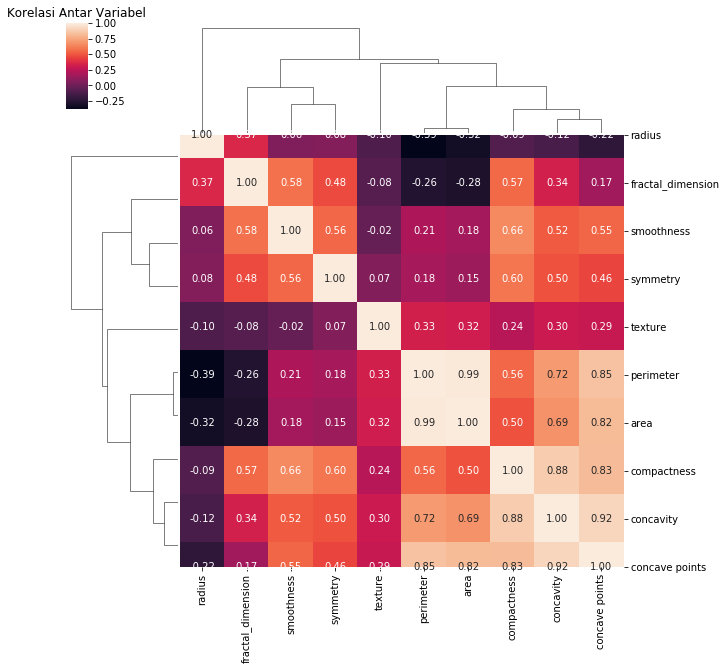

In [59]:
corr_matrix=data.corr()
sns.clustermap(corr_matrix,annot=True,fmt=".2f")
plt.title("Korelasi Antar Variabel")
plt.show()

### <center>E. *Feature Extraction dengan PCA*</center>

#### Analisis PCA

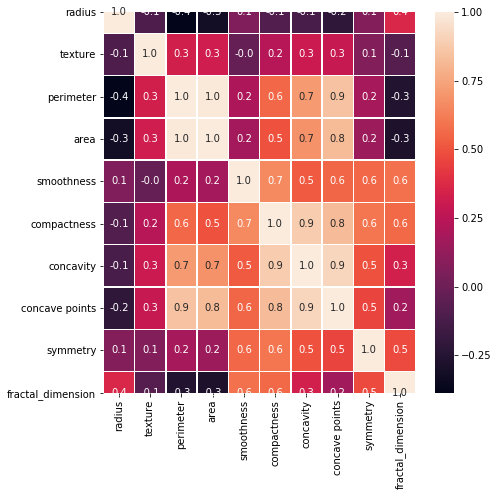

In [32]:
data = pd.read_excel('D:/breastcancer.xlsx')
data.drop(["Unnamed: 32", "id", "diagnosis"], axis = 1, inplace = True)
f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [34]:
data = pd.read_excel('D:/breastcancer.xlsx')
data.drop(["Unnamed: 32", "id", "diagnosis"], axis = 1, inplace = True)
X = StandardScaler().fit_transform(data)
 
pca = PCA(n_components=0.85, whiten=True) 
 
X_pca = pca.fit_transform(X)

print('Original number of features:', X.shape[1]) 
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 10
Reduced number of features: 4


Projecting 10-dimensional data to 2D


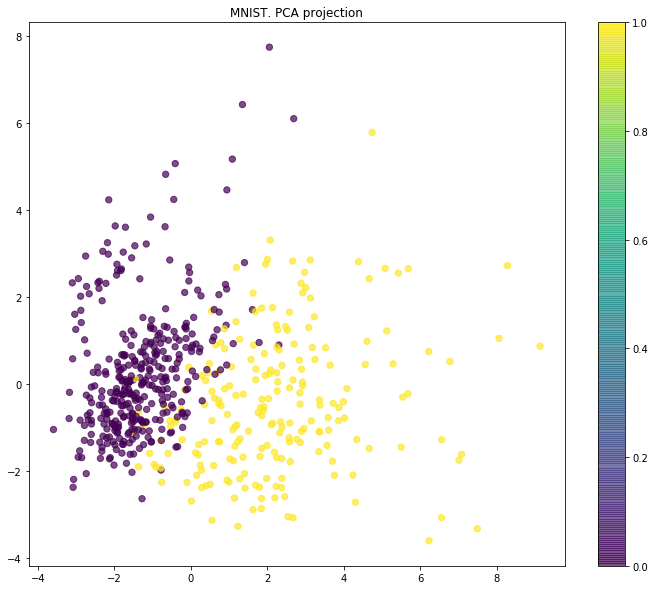

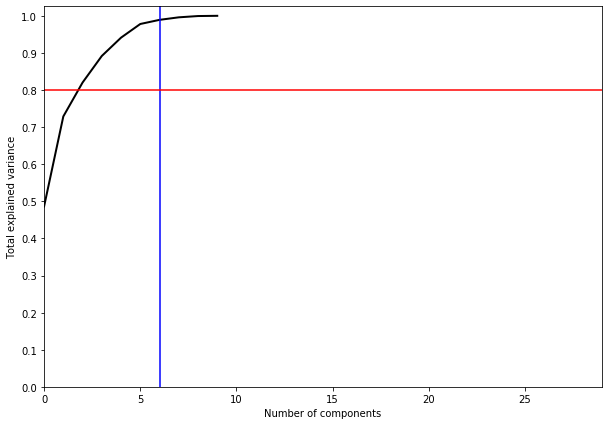

In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import decomposition
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel("D:/breastcancer.xlsx", index_col = 'id')
df.drop('Unnamed: 32',axis = 1 ,inplace = True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B':0})
X = df.drop('diagnosis',axis = 1)
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

pca = decomposition.PCA(n_components=2)
X_pca_scaled = pca.fit_transform(X_scaled)

print('Projecting %d-dimensional data to 2D' % X_scaled.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=df['diagnosis'], alpha=0.7, s=40);
plt.colorbar()
plt.title('MNIST. PCA projection');
pca = decomposition.PCA().fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 29)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(6, c='b')
plt.axhline(0.8, c='r')
plt.show();

In [23]:
data = pd.read_excel('D:/breastcancer.xlsx')
data.drop(["Unnamed: 32", "id", "diagnosis"], axis = 1, inplace = True)
X = StandardScaler().fit_transform(data)
 
pca = PCA(n_components=0.80, whiten=True) 
 
X_pca = pca.fit_transform(X)

print('Original number of features:', X.shape[1]) 
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 10
Reduced number of features: 3
